# Prelab03 - Low Pass Filter

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
from control import TransferFunction, tf, bode_plot, step_response, impulse_response

### Prelab Q6

Plot the bode plot (both magnitude and phase response) of a first order low pass filter with unity gain and a cut-off frequency of 100Hz.</br>
**Make sure the plots have frequency in unit ’hertz’** (You can use either the scipy or control package available in python)

If using *scipy*, you can use the functions `TransferFunction` and `bode` </br>
If using *control*,  you can use the function `TransferFunction`, `tf`, and `bode_plot`

The transfer function of a simple low-pass filter, with unity gain, is:
$$ H(s) = \frac{1}{\tau s + 1}$$

where $\tau = RC = \frac{1}{2\pi f_c}$

In [3]:
# defining cutoff frequency and time constant
fc = 100
tau = 1/(fc)

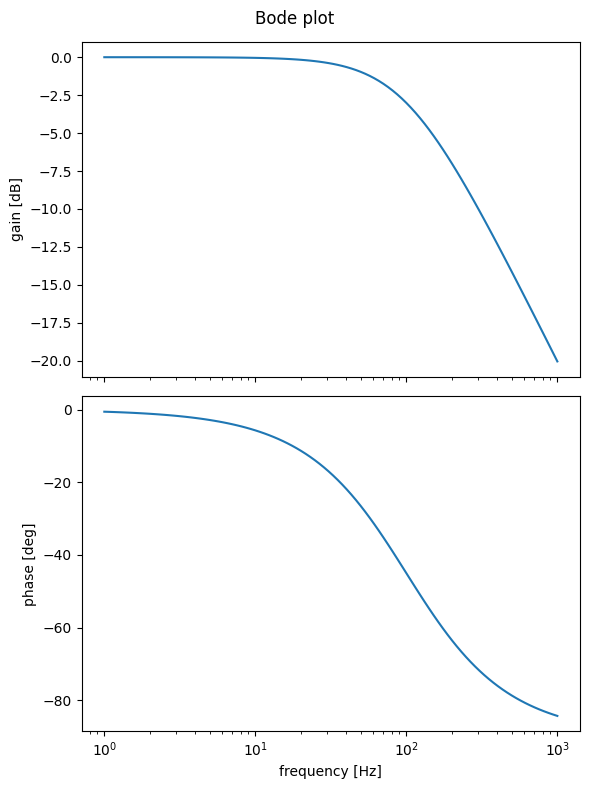

In [4]:
# you can use either sciyp or python-control to compute your bode plot
tf = signal.TransferFunction([1], [tau, 1])
w, mag, phase = signal.bode(tf)

# sharex=True ensures both plots share the same x-axis
fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
fig.suptitle('Bode plot')

axs[0].semilogx(w, mag)
axs[0].set_ylabel('gain [dB]')

axs[1].semilogx(w, phase)
axs[1].set_ylabel('phase [deg]')
axs[1].set_xlabel('frequency [Hz]')

fig.tight_layout()

### Prelab Q7
Plot the impulse and step response of the transfer function defined above.</br>
**Make sure to label all axis and include their units.**

If using *scipy*, you can use the functions `impulse` and `step` </br>
If using *control*,  you can use the functions `TransferFunction`, `tf`, and `bode_plot`

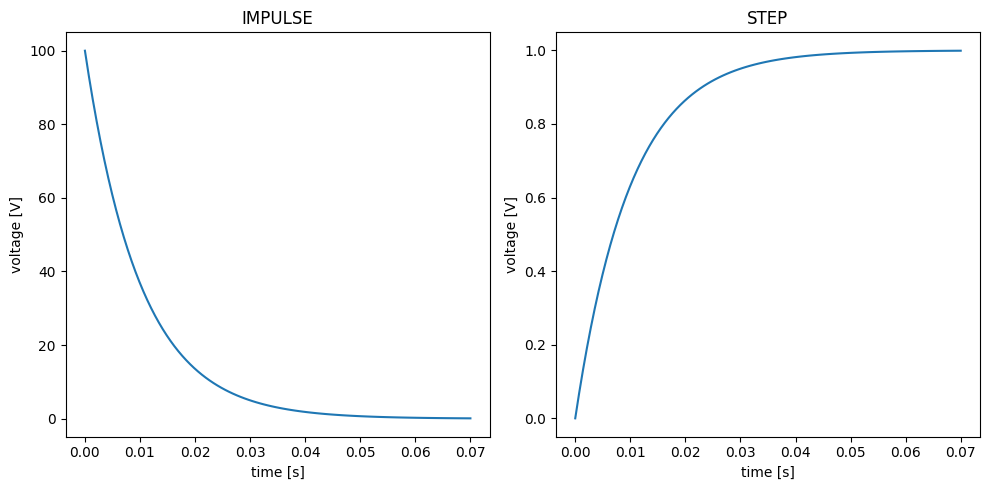

In [5]:
# you can use either sciyp or python-control

fig, axs = plt.subplots(1, 2, figsize=(10,5))

t_imp, y_imp = signal.impulse(tf)
t_step, y_step = signal.step(tf)

axs[0].plot(t_imp, y_imp)
axs[0].set_title('IMPULSE')
axs[0].set_xlabel('time [s]')
axs[0].set_ylabel('voltage [V]')


axs[1].plot(t_step, y_step)
axs[1].set_title('STEP')
axs[1].set_xlabel('time [s]')
axs[1].set_ylabel('voltage [V]')

fig.tight_layout()

### Prelab Q8
What’s the maximum phase shift introduced by the filter?</br>

ans: pi/2 


### Prelab Q9
What is the gain at the cut-off frequency?</br>

ans: 1/2 (around -3 dB)


### Prelab Q10
Can the filter be used to change the input frequency of your signal? Why or why not?</br>

ans:</br>
The low pass filter cannot be used to change the frequency of the input signal.</br>
    Since it just filter out the high frequency signal allowing the low frequency signal pass through.</br>
    So, the low pass filter cannot directly modify the signal.


# Lab03 - Postlab Questions

### Postlab Q6 - Resistive Divider Circuit
Generate sinusoidal signals at frequencies of 20Hz, 40 Hz, 60 Hz, 80Hz, 100 Hz, 200 Hz and measurethe output of the circuit at each of these frequencies.

Write down the peak-to-peak values of voltage that you measure at the output.

What kind of trend do you observe in the response of the circuit to inputs of varying frequency?

Plot the ratio of output voltage to input voltage as a function of frequency.

Also explain how/why you chose the delay in your program to achieve these frequencies.

In [6]:
freqs = [20.01, 40.03, 59.95, 80.00, 100.0, 200.0] # in Hz
V_in = [3.12, 3.12, 3.12, 3.12, 3.12, 3.12] # in V

Text(0.5, 1.0, 'voltage ratio - frequency graph')

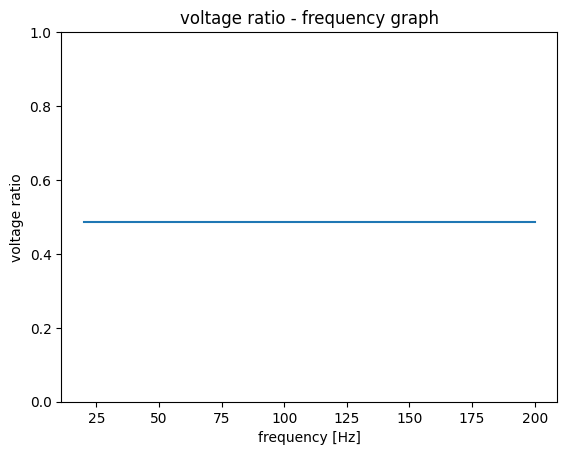

In [8]:
V_out_div = [1.52, 1.52, 1.52, 1.52, 1.52, 1.52]
ratio = [V_out_div[i]/V_in[i] for i in range(len(V_out_div))]

plt.plot(freqs, ratio)
plt.ylim([0, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('voltage ratio')
plt.title('voltage ratio - frequency graph')

### Postlab Q7 - Resistor-Capacitor Network

Generate sinusoidal signals at frequencies of 20Hz, 40 Hz, 60 Hz, 80Hz, 100 Hz, 200 Hz and measure the output of the circuit at each of these frequencies.

Write down the peak-to-peak values of voltage and the phase shift (in millisecs with respect to the input signal) that you measure at the output terminal.

You can use the second channel to measure the phase shift.

Plot the ratio of output voltage to input voltage as a function of frequency. Similiarly plot the phase shift in degrees as a function of frequency.

Explain the trend observed in each plot. (Hint: Never trust what’s written on components. Always measure to be sure. Also take the offset bias of the multimeter into account.)

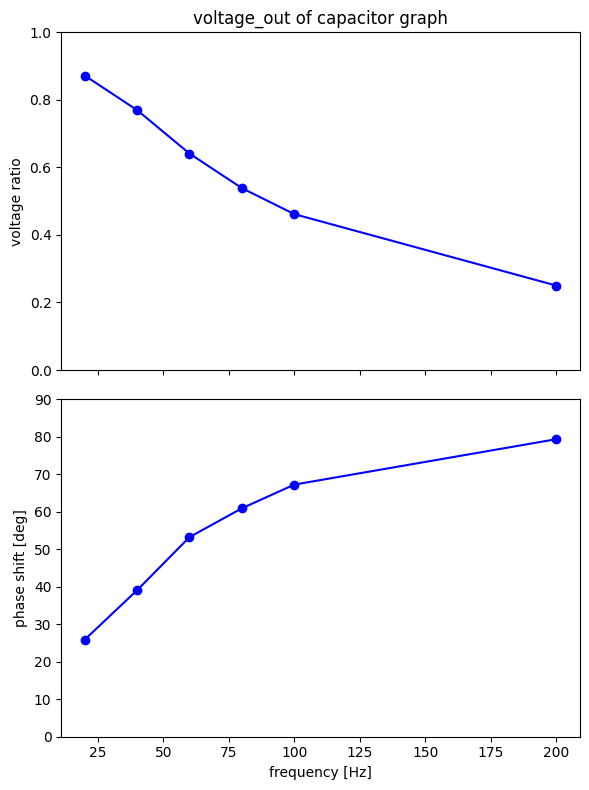

In [13]:
# V_out and phase values can differ

V_out_RC = [02.72, 02.40, 02.00, 01.68, 01.44, 00.78]
phase = [25.9, 39.1, 53.2, 60.9, 67.2, 79.3]
ratio_C = [V_out_RC[i]/V_in[i] for i in range(len(V_in))]

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
axs[0].plot(freqs, ratio_C, 'bo-')
axs[0].set_ylabel('voltage ratio')
axs[0].set_ylim([0, 1])

axs[1].plot(freqs, phase, 'bo-')
axs[1].set_ylabel('phase shift [deg]')
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylim([0, 90])

axs[0].set_title('voltage_out of capacitor graph')

fig.tight_layout()

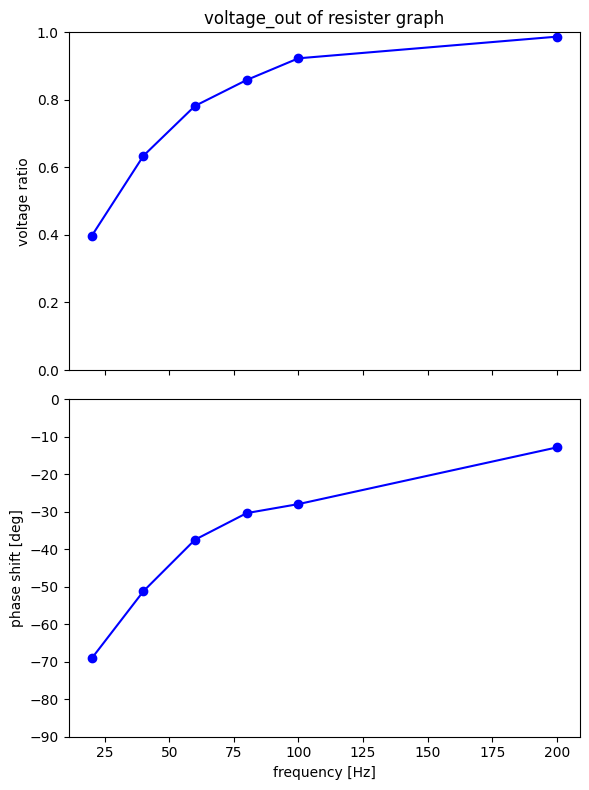

In [15]:
# V_out and phase values can differ

V_out_inv = [01.24, 01.98, 02.44, 02.68, 02.88, 03.08]
phase_inv = [-69.1, -51.2, -37.5, -30.4, -28.0, -12.9]
ratio_inv = [V_out_inv[i]/V_in[i] for i in range(len(V_in))]

fig, axs = plt.subplots(2, 1, figsize=(6,8), sharex=True)
axs[0].plot(freqs, ratio_inv, 'bo-')
axs[0].set_ylabel('voltage ratio')
axs[0].set_ylim([0, 1])

axs[1].plot(freqs, phase_inv, 'bo-')
axs[1].set_ylabel('phase shift [deg]')
axs[1].set_xlabel('frequency [Hz]')
axs[1].set_ylim([-90, 0])

axs[0].set_title('voltage_out of resister graph')

fig.tight_layout()